C:\Users\saumya\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


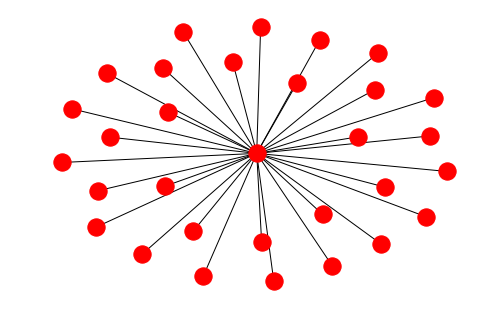

In [13]:
import os
import pandas as pd
from ast import literal_eval
from utils import helpersorigin

def GetOriginPublication(df):    
    return df.loc[df['year'].idxmin()]['id']

#helpersorigin.GetPublications('lstm') #uncomment and run for new concept

#L0
directory_path=os.path.expanduser("~")
df_all=pd.read_csv(directory_path+'\OriginAndEvolutionofConcept\data\outputs\df_concept.csv')
df_originid=GetOriginPublication(df_all)
df_origin=df_all.loc[(df_all['id'] == df_originid)]

#L1
#find outcitations of origin
df_origin['outCitations']=df_origin['outCitations'].apply(lambda x:literal_eval(x))
df_oo_l0l1=df_origin.set_index('id')['outCitations'].to_dict()

#create and display graph (L0L1)
G=helpersorigin.CreateGraph(df_oo_l0l1)
helpersorigin.DisplayGraph_SpringLayout(G)